In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving letter-recognition.csv to letter-recognition.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv("/content/iris.csv")
df2=pd.read_csv("/content/letter.csv")
print("Iris\n",df1.head())
print("Letter recognition\n",df2.head())
X_iris = df1.drop('species', axis=1)
y_iris = df1['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_iris, y_train_iris)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_iris, y_train_iris)

Iris
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Letter recognition
   letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8

SVC(random_state=42)

In [ ]:
y_pred_linear = svm_linear.predict(X_test_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)

# Accuracy and Confusion Matrix for Linear Kernel
accuracy_linear = accuracy_score(y_test_iris, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test_iris, y_pred_linear)

# Accuracy and Confusion Matrix for RBF Kernel
accuracy_rbf = accuracy_score(y_test_iris, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test_iris, y_pred_rbf)

# Display Results
print(f"Linear Kernel Accuracy: {accuracy_linear}")
print(f"RBF Kernel Accuracy: {accuracy_rbf}")

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 1.0


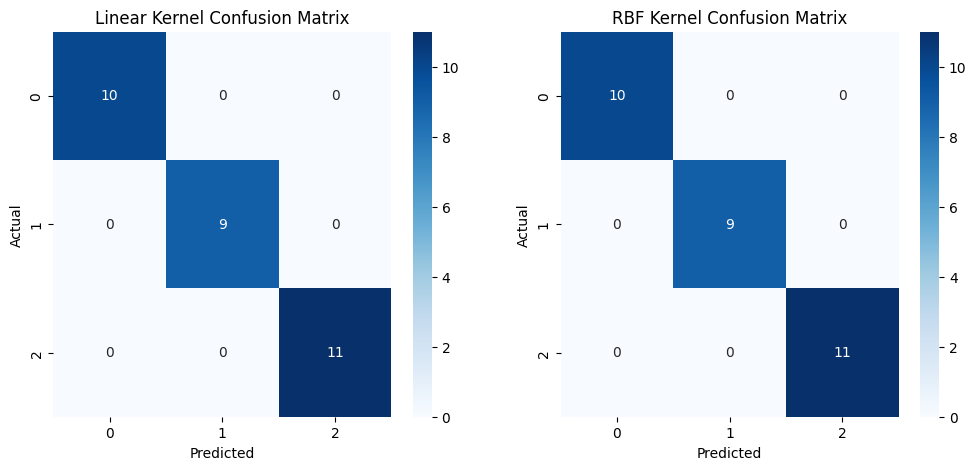

In [ ]:
# Confusion Matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title("Linear Kernel Confusion Matrix")
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title("RBF Kernel Confusion Matrix")
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

LETTER RECOGNITION

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
X_letter = df2.drop('letter', axis=1)
y_letter = df2['letter']

y_letter = y_letter.astype('category').cat.codes

X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(X_letter, y_letter, test_size=0.2, random_state=42)

# Linear Kernel SVM for Letter Recognition
svm_linear_letter = SVC(kernel='linear', random_state=42, probability=True)
svm_linear_letter.fit(X_train_letter, y_train_letter)

# RBF Kernel SVM for Letter Recognition
svm_rbf_letter = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf_letter.fit(X_train_letter, y_train_letter)

SVC(probability=True, random_state=42)

In [ ]:
y_pred_linear_letter = svm_linear_letter.predict(X_test_letter)
y_pred_rbf_letter = svm_rbf_letter.predict(X_test_letter)

accuracy_linear_letter = accuracy_score(y_test_letter, y_pred_linear_letter)
conf_matrix_linear_letter = confusion_matrix(y_test_letter, y_pred_linear_letter)

accuracy_rbf_letter = accuracy_score(y_test_letter, y_pred_rbf_letter)
conf_matrix_rbf_letter = confusion_matrix(y_test_letter, y_pred_rbf_letter)

print(f"Linear Kernel Accuracy (Letter-recognition): {accuracy_linear_letter}")
print(f"RBF Kernel Accuracy (Letter-recognition): {accuracy_rbf_letter}")

Linear Kernel Accuracy (Letter-recognition): 0.8545
RBF Kernel Accuracy (Letter-recognition): 0.9305


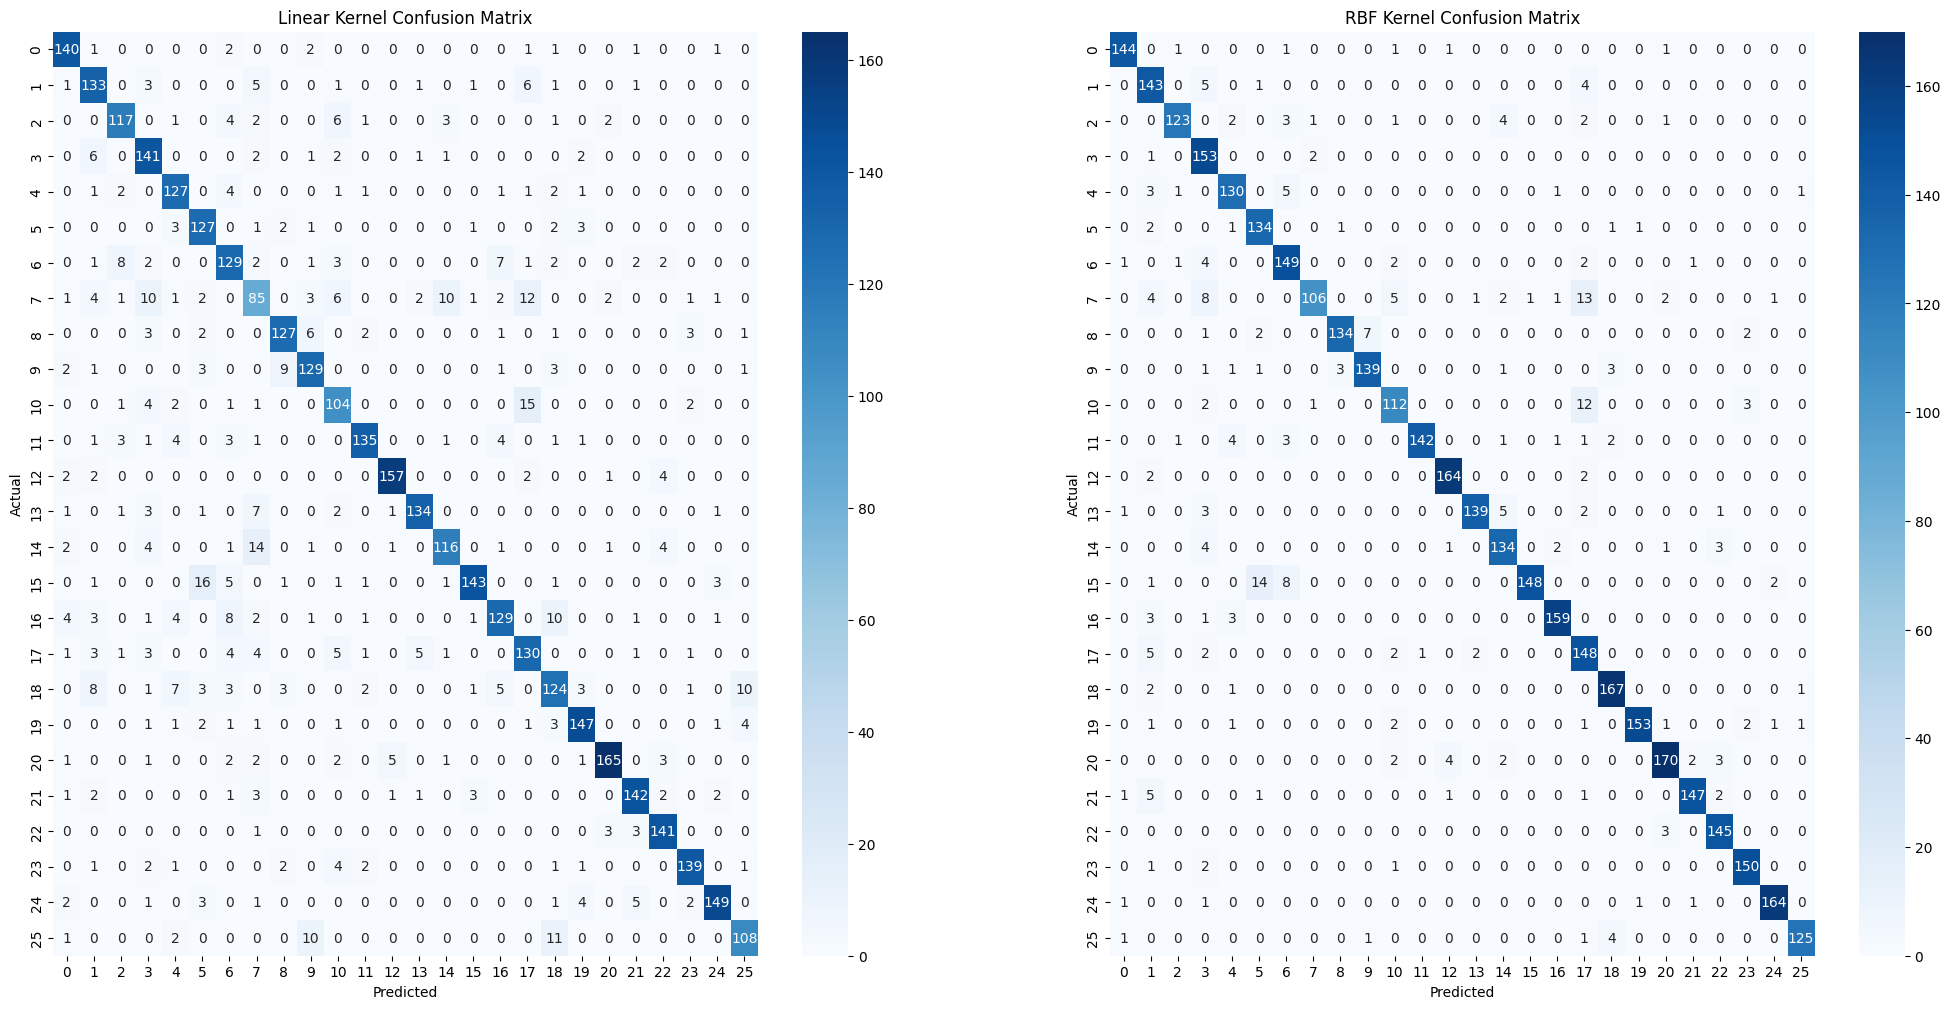

In [ ]:
# Confusion Matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))

sns.heatmap(conf_matrix_linear_letter, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title("Linear Kernel Confusion Matrix")
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(conf_matrix_rbf_letter, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title("RBF Kernel Confusion Matrix")
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

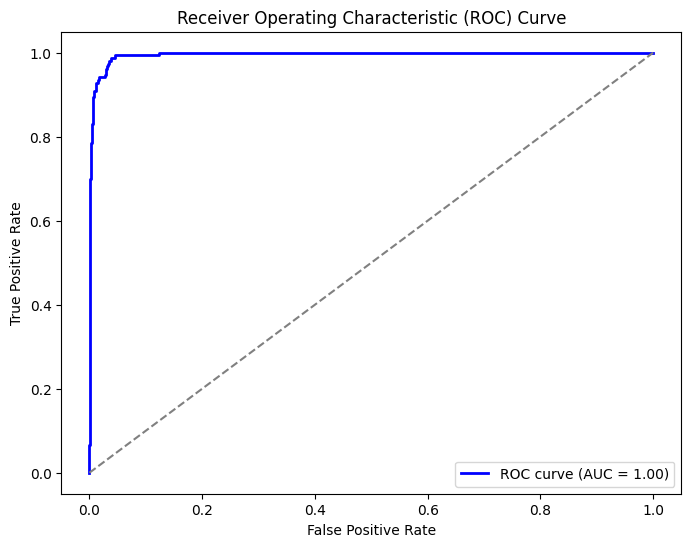

In [ ]:
# Plotting ROC curve for Linear Kernel
fpr, tpr, thresholds = roc_curve(y_test_letter, svm_linear_letter.predict_proba(X_test_letter)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()